Question 1

In [0]:
from google.colab import files
uploaded = files.upload()

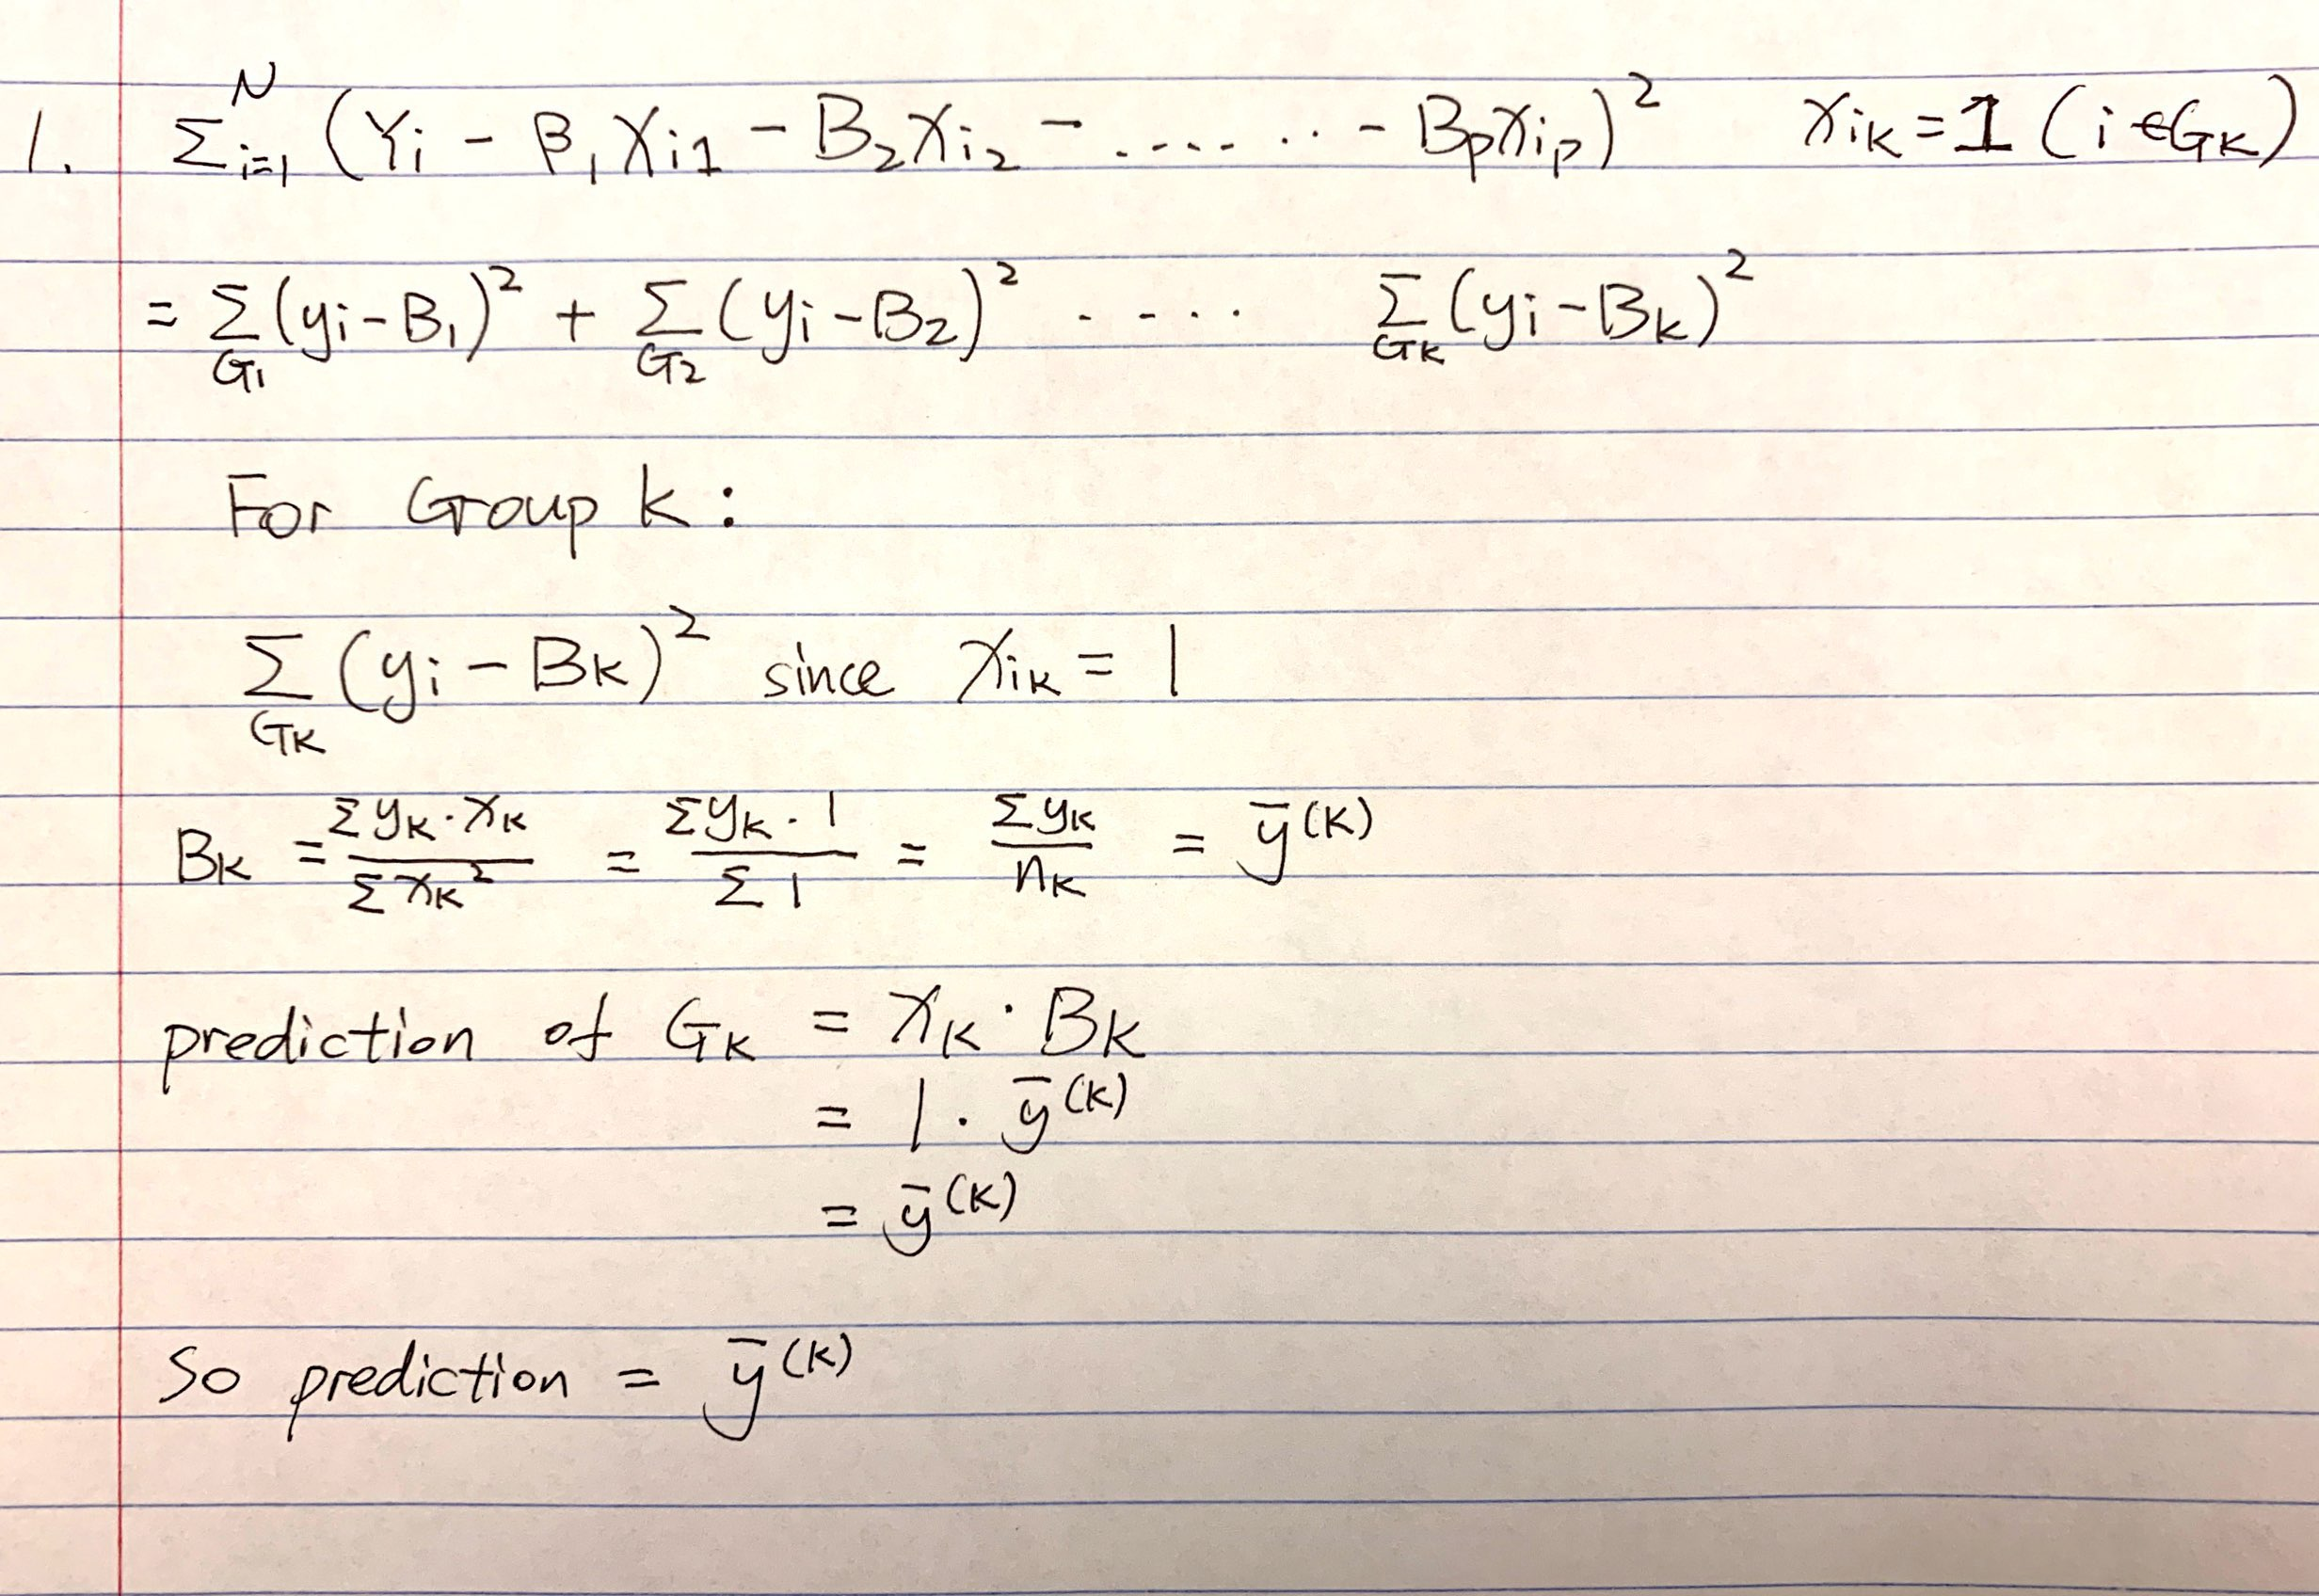

In [0]:
from IPython.display import Image
Image("Quiz2q1.jpg", width=800, height=600)


Question 2

In [0]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
dat.head(5)

Regression coefficients:

Slope: 1.0675677731655158

Intercept: -694.1809221478507

In sample error rate: 832740.3005383236



Text(0, 0.5, 'Left diencephalon volume')

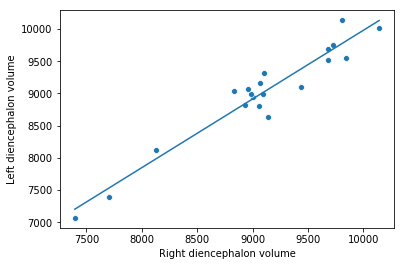

In [0]:
## Find volume for DL and DR
DLV = dat.volume[dat.roi == 'Diencephalon_L']
DRV = dat.volume[dat.roi == 'Diencephalon_R']

DLV = DLV.reset_index(drop = True)
DRV = DRV.reset_index(drop = True)

## Find regression coefficients
beta1 = st.pearsonr(DRV, DLV)[0] * np.std(DLV) / np.std(DRV)
beta0 = np.mean(DLV) - np.mean(DRV) * beta1

## Find in sample error rate
DLVP = beta0 + beta1 * DRV
ISE = np.sum((DLV - DLVP) ** 2)

## Print values
print('Regression coefficients:\n')
print('Slope: ' + str(beta1) + '\n')
print('Intercept: ' + str(beta0) + '\n')
print('In sample error rate: ' + str(ISE) + '\n')

## PLot of data and regression line
## Plot data in scatterplot
sns.scatterplot(DRV, DLV)
## add regression line
sns.lineplot(DRV, beta0 + beta1 * DRV)
plt.xlabel('Right diencephalon volume')
plt.ylabel('Left diencephalon volume')

Question 3  
  
  A possible project is to use Average salary per state data to classify and predict average winter holiday season spending per state. For example, use the average salary per state data and average holiday season spending data from 2006 - 2016 to train a model that can be used to predict the holiday season spending from 2017 - now.